# Análisis del Mercado de Restaurantes en LA 
Estrategias para la Sostenibilidad en un Café Regentado por Robots

## Introducción

Los Ángeles, conocida por su vibrante escena gastronómica, se presenta como un terreno fértil para la innovación en el sector de la restauración. En este contexto, surge la idea de abrir un café regentado por robots, una propuesta que no solo busca ofrecer una experiencia única a los clientes, sino también abrazar la automatización y la tecnología en un sector tradicionalmente humano.

Sin embargo, el éxito de este proyecto no solo depende de la novedad de la idea, sino también de la comprensión profunda del mercado en el que se insertará. Para ello, es crucial llevar a cabo un análisis exhaustivo de los datos disponibles sobre los restaurantes en Los Ángeles, con el objetivo de identificar tendencias, entender las preferencias del consumidor y establecer estrategias que aseguren la sostenibilidad a largo plazo del negocio.

En este estudio, se llevará a cabo un análisis detallado del mercado de restaurantes en Los Ángeles, explorando aspectos como la composición del mercado, la presencia de cadenas, la distribución del número de asientos y la concentración geográfica de los establecimientos. Además, se ofrecerán recomendaciones fundamentadas sobre el tipo de establecimiento y el número de asientos, así como se discutirá la viabilidad de desarrollar una cadena en este contexto.

A través de este análisis, se busca proporcionar una visión completa del mercado, permitiendo tomar decisiones informadas y estratégicas que garanticen el éxito del café regentado por robots en Los Ángeles.

### Importación de librerías

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px


### Cargar Datos

In [2]:
# Cargar los datos desde el archivo CSV
df = pd.read_csv("/datasets/rest_data_us_upd.csv")


### Exploración de datos

In [3]:
def explorar_datos(datos, nombre):
    """
    Esta función proporciona información general sobre un conjunto de datos.

    Args:
    datos (DataFrame): El conjunto de datos a explorar.
    nombre (str): El nombre del conjunto de datos.
    """
    print(f"Exploración de datos para '{nombre}':")
    
    # Información general
    print('Información general del conjunto de datos:')
    print(datos.info())
    print()
    
    # Primeras filas
    print('Primeras cinco filas:')
    display(datos.head())
    print()
    
    # Descripción
    print('Descripción del conjunto de datos:')
    display(datos.describe())
    print()
    
    # Duplicados y valores faltantes
    print(f"Este conjunto de datos tiene {datos.duplicated().sum()} duplicados.")
    print()
    print('¿Cuántos valores faltantes tiene este conjunto de datos?')
    missing_values = datos.isna().sum()
    print(missing_values)
    print()
    
    # Porcentaje de valores faltantes
    print('¿Cuál es el porcentaje de valores faltantes?')
    print(missing_values / len(datos) * 100)
    print()

# Usamos la función para explorar nuestros datos
explorar_datos(df, 'restaurantes')


Exploración de datos para 'restaurantes':
Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
None

Primeras cinco filas:


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20



Descripción del conjunto de datos:


,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000



Este conjunto de datos tiene 0 duplicados.

¿Cuántos valores faltantes tiene este conjunto de datos?
id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

¿Cuál es el porcentaje de valores faltantes?
id             0.000000
object_name    0.000000
address        0.000000
chain          0.031085
object_type    0.000000
number         0.000000
dtype: float64



Después de explorar los datos, hemos identificado áreas de mejora y acciones potenciales. En primer lugar, observamos tres valores faltantes en la columna 'chain', lo que requiere una decisión sobre cómo manejar estos datos. Además, notamos que los tipos de datos son adecuados en todas las columnas, sin embargo, podríamos beneficiarnos de un análisis más detallado del número de asientos para comprender mejor la distribución de tamaños de los restaurantes. Por último, aunque las mayúsculas y minúsculas en las columnas 'object_name' y 'object_type' son consistentes, consideramos que normalizar los datos podría mejorar la consistencia y facilitar comparaciones futuras. Estas acciones nos ayudarán a mejorar la calidad de los datos y a obtener información más precisa para tomar decisiones estratégicas en nuestro negocio de café regentado por robots en Los Ángeles.

### Corrección de tipos de datos

In [4]:
def corregir_datos(df):
    """
    Esta función corrige los datos según las recomendaciones dadas.

    Parámetros:
    df (DataFrame): El DataFrame que contiene los datos a corregir.

    Retorna:
    DataFrame: El DataFrame con las correcciones aplicadas.
    """
    # Imputar valores faltantes en la columna 'chain'
    df['chain'].fillna(False, inplace=True)

    # Normalizar mayúsculas y minúsculas en las columnas 'object_name' y 'object_type'
    df['object_name'] = df['object_name'].str.title()
    df['object_type'] = df['object_type'].str.title()

    # Mostrar los primeros cinco registros del DataFrame después de aplicar las correcciones
    print("Primeros cinco registros del DataFrame después de aplicar las correcciones:")
    display(df.head())

    # Mostrar mensaje de confirmación
    print("\nCorrecciones aplicadas correctamente.")

    # Devolver el DataFrame corregido
    return df

# Aplicar la función para corregir los datos y mostrar los resultados
df_corregido = corregir_datos(df.copy())




Primeros cinco registros del DataFrame después de aplicar las correcciones:


,id,object_name,address,chain,object_type,number
0,11786,Habitat Coffee Shop,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,Reilly'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,Street Churros,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,Triniti Echo Park,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,Pollen,2100 ECHO PARK AVE,False,Restaurant,20



Correcciones aplicadas correctamente.


## Análisis de datos

### Proporciones de los distintos tipos de establecimientos

Cantidad de cada tipo de establecimiento:


,object_type,count_object_type
0,Bakery,283
1,Bar,292
2,Cafe,435
3,Fast Food,1066
4,Pizza,320
5,Restaurant,7255


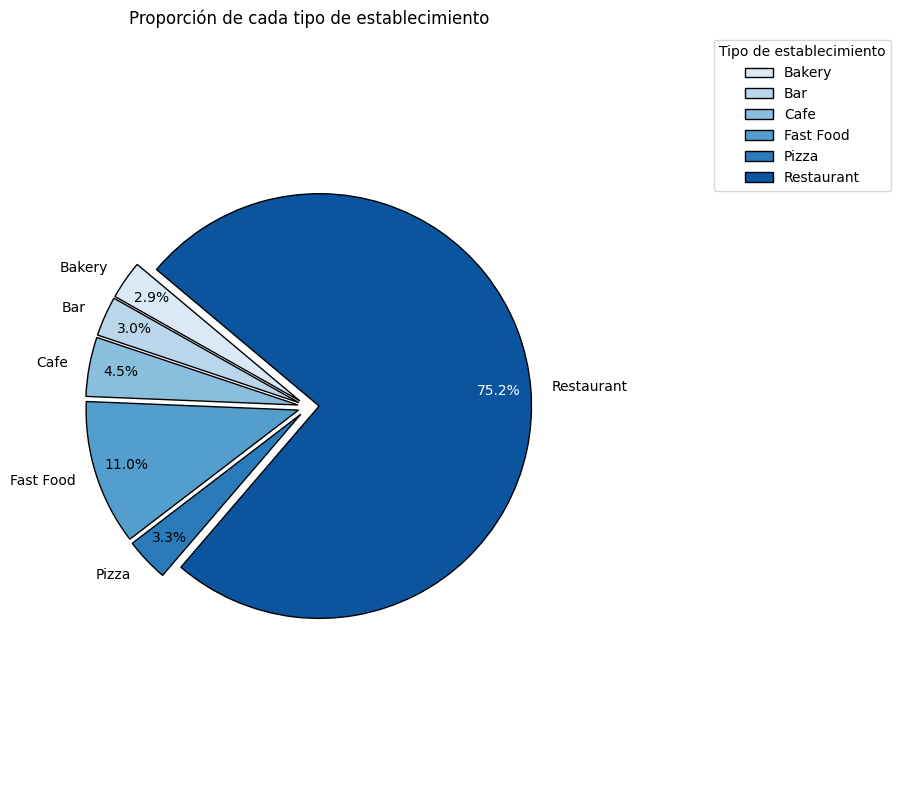

In [5]:
# Calcular la cantidad para cada tipo de establecimiento utilizando groupby()
object_type_qty = df.groupby('object_type').size().reset_index(name='count_object_type')

# Mostrar el DataFrame resultante
print("Cantidad de cada tipo de establecimiento:")
display(object_type_qty)
print()

# Graficar las proporciones
plt.figure(figsize=(10, 8))

# Definir una paleta de colores secuencial en azul
blue_palette = sns.color_palette("Blues", len(object_type_qty))

# Graficar las proporciones con la paleta de colores definida
pie = plt.pie(object_type_qty['count_object_type'], labels=object_type_qty['object_type'], autopct='%1.1f%%', startangle=140, colors=blue_palette, wedgeprops={'linewidth': 1, 'edgecolor': 'black'}, pctdistance=0.85, explode=[0.05] * len(object_type_qty))

# Ajustar el color del texto de los porcentajes para que sea legible en función del color de fondo del segmento del pastel
for text in pie[2]:
    text.set_color('white') if float(text.get_text().strip('%')) > 20 else text.set_color('black')

plt.title('Proporción de cada tipo de establecimiento')
plt.axis('equal')
plt.legend(object_type_qty['object_type'], title='Tipo de establecimiento', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

Al analizar los datos, encontramos que el conjunto de datos contiene principalmente seis tipos de establecimientos: Bakery, Bar, Cafe, Fast Food, Pizza y Restaurant. La cantidad de restaurantes varía considerablemente entre estos tipos, siendo Fast Food y Restaurant los más comunes, con 1,066 y 7,255 establecimientos respectivamente.

### Proporciones de los establecimientos que pertenecen a una cadena y de los que no

Cantidad de establecimientos que pertenecen a una cadena:


,chain,count_chains
0,No,5972
1,Sí,3676


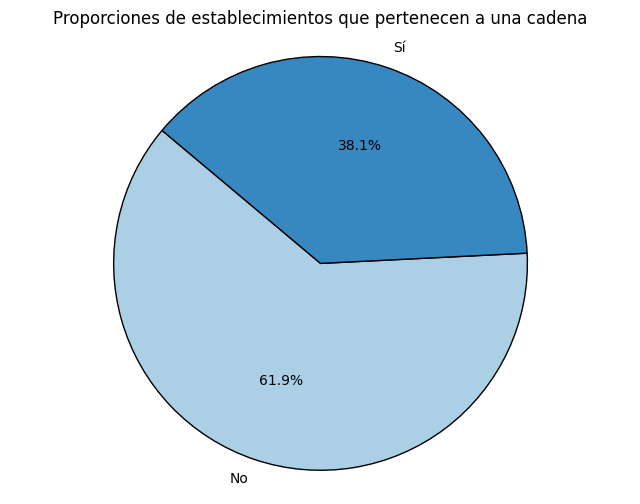

In [6]:
# Se agrupan los datos de la columna 'chain' y se contabilizan los establecimientos para las agrupaciones
chain_qty = df.groupby('chain').size().reset_index(name='count_chains')

# Cambiar los nombres de las categorías True y False a Sí y No respectivamente
chain_qty['chain'] = chain_qty['chain'].map({True: 'Sí', False: 'No'})

# Mostrar el DataFrame resultante
print("Cantidad de establecimientos que pertenecen a una cadena:")
display(chain_qty)

# Definir una paleta de colores
colors_palette = sns.color_palette("Blues", len(chain_qty))

# Graficar las proporciones en un gráfico de pastel con la paleta de colores definida
plt.figure(figsize=(8, 6))
plt.pie(chain_qty['count_chains'], labels=chain_qty['chain'], autopct='%1.1f%%', startangle=140, colors=colors_palette, wedgeprops={'edgecolor': 'black'})
plt.title('Proporciones de establecimientos que pertenecen a una cadena')
plt.axis('equal')
plt.show()


El análisis revela que de los establecimientos considerados, la mayoría no pertenecen a una cadena, representando un 62% del total, mientras que el restante 38% sí son parte de una cadena. Esta distribución puede indicar una diversidad en la oferta gastronómica de Los Ángeles, con una significativa presencia de establecimientos independientes. Sin embargo, la presencia de cadenas también es notable, lo que sugiere la existencia de una competencia variada en el mercado, con diferentes modelos de negocio y estrategias comerciales. Estos hallazgos pueden ser clave para comprender la dinámica del mercado y formular estrategias efectivas para el éxito del café regentado por robots, considerando tanto la presencia de establecimientos independientes como de cadenas establecidas.va

### ¿Qué tipo de establecimiento es habitualmente una cadena?

Proporciones de establecimientos:


,object_type,chain_count,total_count,percentage
0,Bakery,283,283,100.000000
1,Bar,77,292,26.369863
2,Cafe,266,435,61.149425
3,Fast Food,605,1066,56.754221
4,Pizza,153,320,47.812500
5,Restaurant,2292,7255,31.592006


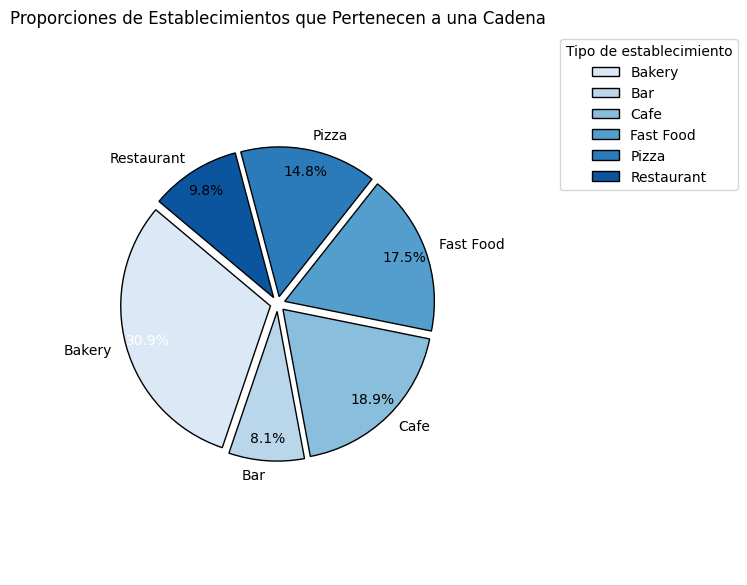

Proporciones de establecimientos:


,object_type,non_chain_count,total_count,percentage
0,Bar,215,292,73.630137
1,Cafe,169,435,38.850575
2,Fast Food,461,1066,43.245779
3,Pizza,167,320,52.187500
4,Restaurant,4963,7255,68.407994


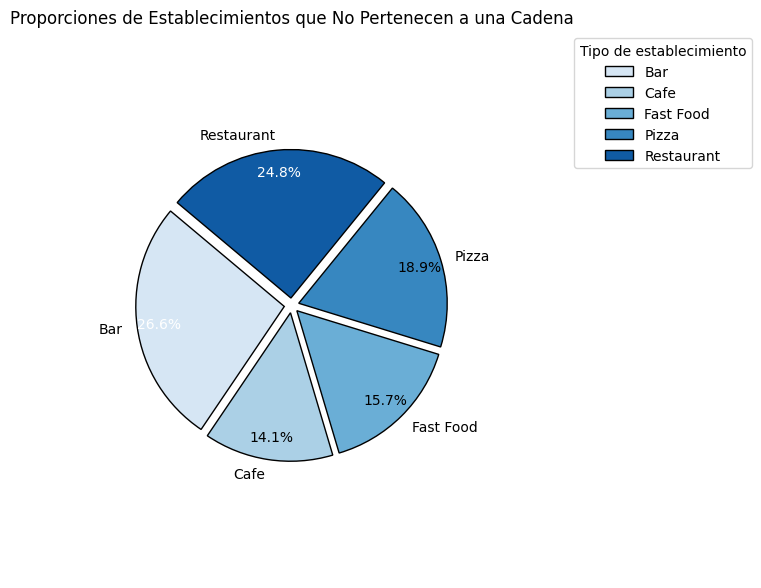

In [8]:
def plot_pie_chart(data, title):
    # Mostrar el DataFrame resultante
    print("Proporciones de establecimientos:")
    display(data)

    # Graficar las proporciones en un gráfico de pastel con Matplotlib
    plt.figure(figsize=(8, 6))

    # Definir una paleta de colores secuencial en azul
    blue_palette = sns.color_palette("Blues", len(data))

    # Crear el gráfico de pastel con separación entre las porciones
    wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
    pie = plt.pie(data['percentage'], labels=data['object_type'], autopct='%1.1f%%', startangle=140, colors=blue_palette, wedgeprops=wedgeprops, pctdistance=0.85, explode=[0.05] * len(data))

    # Ajustar el color del texto de los porcentajes para que sea legible en función del color de fondo del segmento del pastel
    for text in pie[2]:
        text.set_color('white') if float(text.get_text().strip('%')) > 20 else text.set_color('black')

    # Añadir el título
    plt.title(title)

    # Ajustar el tamaño de la leyenda y ubicarla en la esquina superior derecha fuera del gráfico
    plt.legend(data['object_type'], title='Tipo de establecimiento', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))

    # Mostrar el gráfico de pastel
    plt.axis('equal')  # Mantener el aspecto de círculo
    plt.tight_layout()
    plt.show()

# Filtrar el DataFrame para los establecimientos que pertenecen a una cadena
chain_true = df_corregido[df_corregido['chain']]

# Calcular el número total de cada tipo de establecimiento
total_types = df_corregido.groupby('object_type').size().reset_index(name='total_count')

# Calcular el número de cada tipo de establecimiento que pertenece a una cadena
chain_true_type = chain_true.groupby('object_type').size().reset_index(name='chain_count')

# Merge para obtener el total y el count en el mismo DataFrame
merged_chain_true = pd.merge(chain_true_type, total_types, on='object_type')

# Calcular el porcentaje de cada tipo de establecimiento que pertenece a una cadena
merged_chain_true['percentage'] = (merged_chain_true['chain_count'] / merged_chain_true['total_count']) * 100

# Generar el gráfico de pastel y mostrar el DataFrame resultante
plot_pie_chart(merged_chain_true, "Proporciones de Establecimientos que Pertenecen a una Cadena")

# Filtrar el DataFrame para los establecimientos que no pertenecen a una cadena
chain_false = df_corregido[~df_corregido['chain']]

# Calcular el número de cada tipo de establecimiento que no pertenece a una cadena
chain_false_type = chain_false.groupby('object_type').size().reset_index(name='non_chain_count')

# Merge para obtener el total y el count en el mismo DataFrame
merged_chain_false = pd.merge(chain_false_type, total_types, on='object_type')

# Calcular el porcentaje de cada tipo de establecimiento que no pertenece a una cadena
merged_chain_false['percentage'] = (merged_chain_false['non_chain_count'] / merged_chain_false['total_count']) * 100

# Generar el gráfico de pastel y mostrar el DataFrame resultante
plot_pie_chart(merged_chain_false, "Proporciones de Establecimientos que No Pertenecen a una Cadena")

El análisis revela que la mayoría de los establecimientos que pertenecen a una cadena son del tipo "Restaurante", seguidos por "Comida rápida" y "Panadería". Esta distribución indica una fuerte presencia de cadenas en estos sectores específicos de la industria alimentaria. Por otro lado, los establecimientos independientes muestran una diversidad más amplia de tipos, aunque "Restaurante" sigue siendo el tipo más común incluso entre los no pertenecientes a cadenas. Esto sugiere que mientras las cadenas tienden a dominar ciertos segmentos, los establecimientos independientes tienen una presencia más amplia y diversa en la industria, ofreciendo una variedad más extensa de experiencias gastronómicas.

### Características de las Cadenas: Distribución de Establecimientos y Asientos

Promedio de Asientos por Tipo de Restaurante en Cadenas:


,Tipo de Restaurante,Promedio de Asientos
0,Bakery,21.773852
1,Bar,40.259740
2,Cafe,25.917293
3,Fast Food,38.089256
4,Pizza,25.529412
5,Restaurant,44.856021


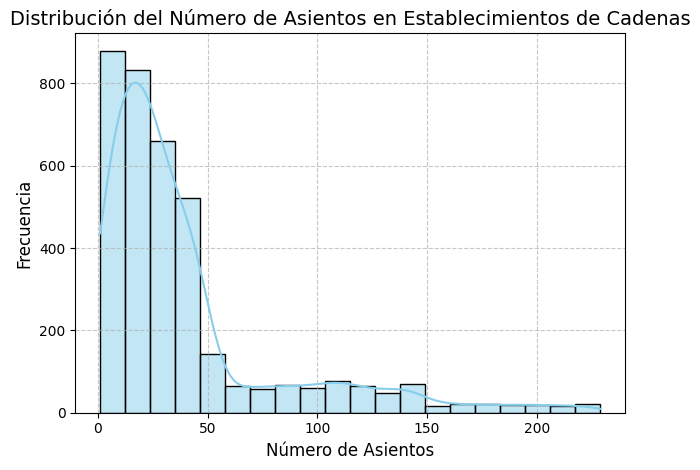

In [9]:
# Mostrar la tabla con el promedio de número de asientos por tipo de restaurante en cadenas
print("Promedio de Asientos por Tipo de Restaurante en Cadenas:")
display(chain_true.groupby('object_type')['number'].mean().reset_index().rename(columns={'object_type': 'Tipo de Restaurante', 'number': 'Promedio de Asientos'}))

# Configurar el estilo de color para el gráfico
plt.style.use('seaborn-pastel')

# Graficar la distribución del número de asientos para los establecimientos de cadenas
sns.histplot(chain_true['number'], bins=20, color='skyblue', kde=True)

# Asignar título y nombres de los ejes al gráfico
plt.title('Distribución del Número de Asientos en Establecimientos de Cadenas', fontsize=14)
plt.xlabel('Número de Asientos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


En el análisis del promedio de número de asientos por tipo de restaurante en cadenas, observamos que el tipo de restaurante que tiende a tener el mayor número promedio de asientos es el de tipo "Restaurant". Este hallazgo sugiere que los restaurantes de este tipo, que pueden ofrecer una variedad más amplia de opciones de asientos, son más comunes en las cadenas. Esta información puede ser útil para comprender las preferencias de los consumidores y las estrategias de negocio en la industria de la restauración.

### Análisis del Promedio de Asientos por Tipo de Restaurante en Cadenas

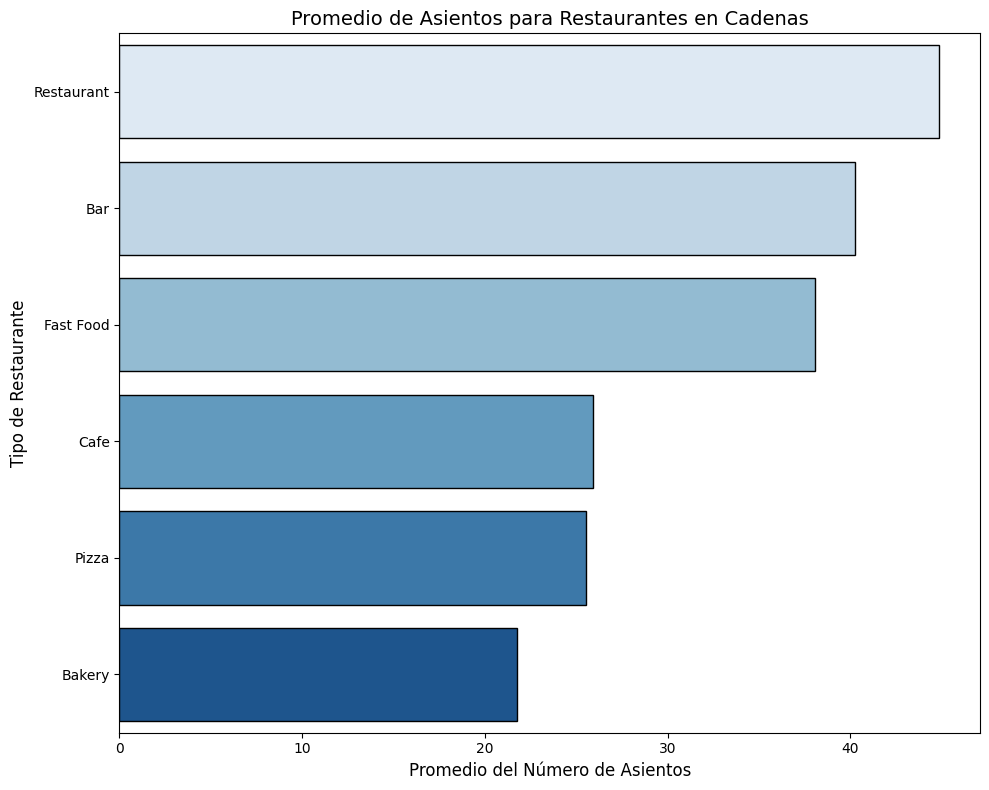

In [14]:
# Agrupar los datos para obtener el promedio de asientos por tipo de establecimiento
chain_avg_seats = chain_true.groupby('object_type')['number'].mean().reset_index()

# Ordenar los datos por el promedio de asientos de mayor a menor
chain_avg_seats = chain_avg_seats.sort_values(by='number', ascending=False)

# Configuración del tamaño y el estilo de color para el gráfico
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-pastel')

# Gráfico de barras utilizando seaborn a partir del DataFrame 'chain_avg_seats' y con la paleta 'Blues'
barplot_chain_seats = sns.barplot(x='number', y='object_type', data=chain_avg_seats, palette='Blues', edgecolor='black')

# Título y nombres de ejes
barplot_chain_seats.set_title('Promedio de Asientos para Restaurantes en Cadenas', fontsize=14)
barplot_chain_seats.set_xlabel('Promedio del Número de Asientos', fontsize=12)
barplot_chain_seats.set_ylabel('Tipo de Restaurante', fontsize=12)

# Ajustar el espacio
plt.tight_layout()
plt.show()

El análisis del promedio de asientos en los establecimientos que forman parte de una cadena revela varios puntos clave. En primer lugar, los restaurantes tienen el mayor promedio de asientos en comparación con otros tipos de establecimientos, lo que indica que suelen tener una mayor capacidad para acomodar a los clientes. Esto es consistente con la estrategia común de los restaurantes de cadenas de atraer a una gran cantidad de clientes y maximizar el espacio disponible para el servicio.

### Análisis de las diez mejores calles por número de restaurantes

El análisis de la distribución geográfica de los establecimientos es crucial para entender cómo se agrupan y dispersan los negocios en una ciudad. Este tipo de análisis permite identificar las zonas con mayor concentración de actividad comercial, lo cual es fundamental para la planificación urbana, el desarrollo de estrategias de marketing y la toma de decisiones empresariales. En este apartado, nos enfocaremos en identificar y visualizar las calles con la mayor cantidad de establecimientos en nuestro conjunto de datos.

Datos con la columna 'street' extraída:


,id,object_name,address,chain,object_type,number,street
0,11786,Habitat Coffee Shop,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,Reilly'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,Street Churros,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,Triniti Echo Park,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,Pollen,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE



Número de Establecimientos por Calle:


,street,count_rest
0,1/2 3RD ST,1
1,1/2 7TH ST,1
2,1/2 BEVERLY BLVD,3
3,1/2 CITY TERRACE DR,1
4,1/2 COLORADO BLVD,1



Top 10 de Calles con más Establecimientos:


,street,count_rest
2680,W SUNSET BLVD,296
2611,W PICO BLVD,288
581,HOLLYWOOD BLVD,167
2826,WILSHIRE BLVD,161
1703,S VERMONT AVE,148
1914,SANTA MONICA BLVD,146
2164,W 3RD ST,145
147,BEVERLY BLVD,135
1294,S FIGUEROA ST,134
754,MELROSE AVE,128


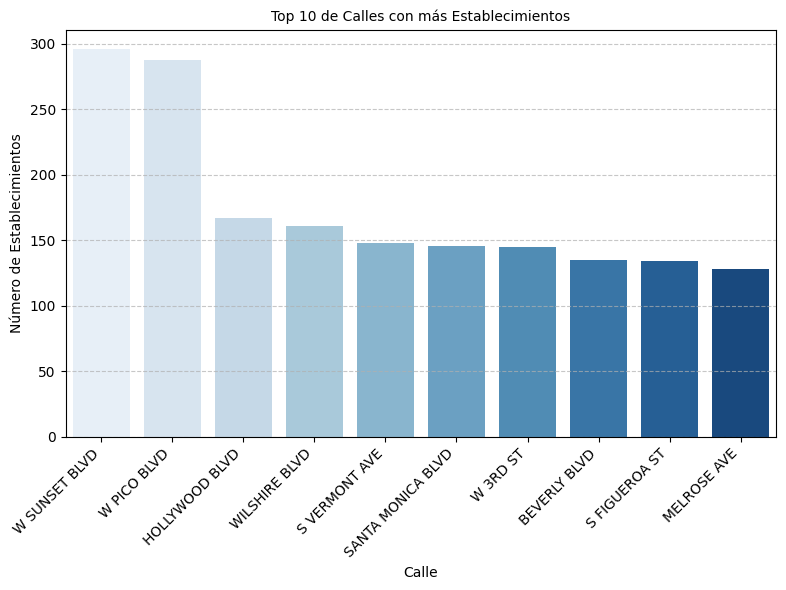

In [11]:
# 1. Extraer el nombre de la calle de la dirección utilizando una expresión regular
df_corregido['street'] = df_corregido['address'].str.extract(r'\s(.+)')
print("Datos con la columna 'street' extraída:")
display(df_corregido.head())

# 2. Agrupar los datos por calle y contar el número de establecimientos, luego reiniciar el índice
num_by_streets = df_corregido.groupby('street')[['object_type']].count().reset_index()

# Renombrar la columna de conteo de establecimientos
num_by_streets = num_by_streets.rename(columns={'object_type': 'count_rest'})
print("\nNúmero de Establecimientos por Calle:")
display(num_by_streets.head())

# Ordenar el DataFrame por el número de establecimientos en orden descendente y seleccionar el top 10
top_10_streets = num_by_streets.sort_values(by='count_rest', ascending=False).head(10)
print("\nTop 10 de Calles con más Establecimientos:")
display(top_10_streets)

# 3. Configurar el tamaño y el estilo de color para el gráfico del top 10 de calles con más establecimientos
plt.figure(figsize=(8, 6))
plt.style.use('seaborn-pastel')

# Graficar el top 10 de las calles con más establecimientos usando seaborn
fig5 = sns.barplot(x='street', y='count_rest', data=top_10_streets, palette='Blues')

# Asignar título y nombres de los ejes al gráfico
fig5.set_title('Top 10 de Calles con más Establecimientos', fontsize=10)
fig5.set_xlabel('Calle', fontsize=10)
fig5.set_ylabel('Número de Establecimientos', fontsize=10)

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Agregar cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


El análisis revela que West Sunset Boulevard (W SUNSET BLVD) y West Pico Boulevard (W PICO BLVD) son las calles con más establecimientos de restaurantes en Los Ángeles, con 296 y 288 locales respectivamente. Estas calles destacan significativamente por encima de las demás en el top 10, con Hollywood Boulevard (HOLLYWOOD BLVD) en el tercer lugar con 167 establecimientos


Número de calles que solo tienen un restaurante: 2450

Distribución del número de asientos en calles con muchos restaurantes:


,id,object_name,address,chain,object_type,number,street
3,11789,Triniti Echo Park,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,Pollen,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
5,11791,The Spot Grill,10004 NATIONAL BLVD,False,Restaurant,14,NATIONAL BLVD
9,11795,Upstairs,3707 N CAHUENGA BLVD,False,Restaurant,35,N CAHUENGA BLVD
10,11796,El Pollo Loco,5319 W SUNSET BLVD,True,Restaurant,38,W SUNSET BLVD


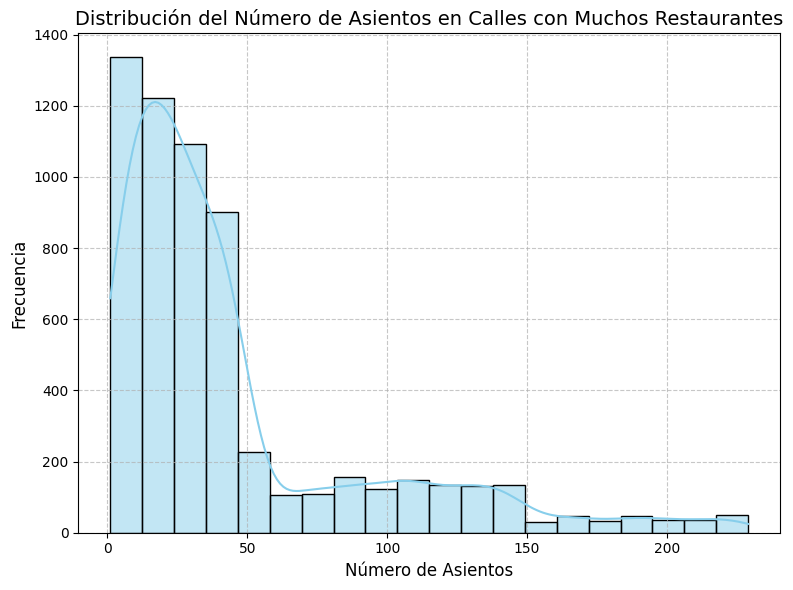

In [12]:
# 4. Encontrar el número de calles que solo tienen un restaurante
streets_with_one_restaurant = num_by_streets[num_by_streets['count_rest'] == 1].shape[0]
print(f"\nNúmero de calles que solo tienen un restaurante: {streets_with_one_restaurant}")

# 5. Analizar la distribución del número de asientos para las calles con muchos restaurantes
# Definir un umbral para "muchos restaurantes", por ejemplo, más de 5
threshold = 5
streets_with_many_restaurants = df_corregido[df_corregido['street'].isin(
    num_by_streets[num_by_streets['count_rest'] > threshold]['street'])]

print("\nDistribución del número de asientos en calles con muchos restaurantes:")
display(streets_with_many_restaurants.head())

plt.figure(figsize=(8, 6))
plt.style.use('seaborn-pastel')

# Graficar la distribución del número de asientos para las calles con muchos restaurantes
sns.histplot(streets_with_many_restaurants['number'], bins=20, color='skyblue', kde=True)

# Asignar título y nombres de los ejes al gráfico
plt.title('Distribución del Número de Asientos en Calles con Muchos Restaurantes', fontsize=14)
plt.xlabel('Número de Asientos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Se identificó que hay un total de 2450 calles en Los Ángeles que solo cuentan con un restaurante, lo que podría sugerir una menor densidad de establecimientos en estas áreas. Además, al analizar la distribución del número de asientos en las calles con muchos restaurantes, se observa que la mayoría de estos locales tienen una capacidad de asientos que oscila entre 10 y 40, con algunas excepciones que pueden llegar hasta los 60 asientos. Esto indica una diversidad en el tamaño de los restaurantes en estas áreas más concurridas, lo que podría reflejar una variedad en la oferta gastronómica y en el tipo de establecimientos presentes.

## Conclusiones del Análisis de Establecimientos de Alimentos en Los Ángeles

El análisis del mercado de restaurantes en Los Ángeles revela que los restaurantes son el tipo de establecimiento más común, representando aproximadamente el 75.2 % del total, seguidos por el sector de comida rápida con un 11 % y las cafeterías con un 4.5 %. En cuanto a la pertenencia a cadenas, aproximadamente el 61.9 % de los establecimientos son parte de una cadena, siendo los restaurantes los más comunes en este grupo, con un 62.4 %. Por otro lado, la mayoría de los establecimientos independientes también son restaurantes (83.1 %). Respecto al número de asientos, aquellos establecimientos con mayor capacidad, que suelen ser parte de una cadena, incluyen principalmente restaurantes, bares y sectores de comida rápida, con un promedio de más de 35 asientos. Las principales calles con establecimientos gastronómicos son W SUNSET BLVD, W PICO BLVD, HOLLYWOOD BLVD, WILSHIRE BLVD, S VERMONT AVE, SANTA MONICA BLVD, W 3RD ST, BEVERLY BLVD, S FIGUEROA ST y MELROSE AVE, siendo áreas centrales de actividad gastronómica en la ciudad. En cuanto a la distribución del número de asientos, la mayoría de los establecimientos tienen entre 0 y 50 asientos, y menos del 10 % tienen más de 124 asientos, lo que sugiere una preferencia por lugares más pequeños y acogedores para los clientes.

## Recomendaciones Generales

Para asegurar el éxito en el mercado de restaurantes en Los Ángeles, es crucial seleccionar una ubicación estratégica considerando la densidad poblacional, competencia y accesibilidad. Una exhaustiva investigación de mercado es esencial para comprender las preferencias del consumidor y la competencia local, permitiendo la especialización y diferenciación del establecimiento. La calidad de los alimentos y el servicio al cliente deben ser prioritarios, respaldados por estrategias efectivas de marketing y promoción. La gestión financiera cuidadosa y la adaptabilidad a las tendencias del mercado son fundamentales para garantizar la viabilidad y el crecimiento a largo plazo.


## Presentación 

Presentation: [enlace](https://drive.google.com/file/d/1VnRlGVtdzHIs3_jFmTA6aw1YNUgqSGU0/view?usp=drive_link)